<a href="https://colab.research.google.com/github/diksham1/image-lab/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing Lab Assignment

In [155]:
import numpy as np; 
import matplotlib.pyplot as plt;
import skimage;
from skimage import io
import skimage.measure as measure
import cv2
from google.colab import files
from skimage import exposure
import random
from scipy.ndimage import uniform_filter, median_filter, generic_filter
from scipy.stats import mode
import math
from skimage.transform import rotate

In [20]:
# Constants used

BASE_FILE_PATH = '/content/'

In [21]:
def showImage(image):
  plt.imshow(image,aspect="auto", cmap='gray')
  plt.show()

Saving p256.dat to p256 (2).dat


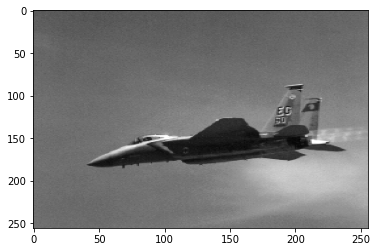

In [73]:
# Upload and display the images
uploaded = files.upload()
filename = list(uploaded.keys())[0];
image = np.loadtxt(filename)
showImage(image)

##Question 1

Write a program to show the minimum and the maximum pixel values of an 8 bits/pixel grayscale image. Also write a program to convert grayscale image to a binary image using threshold (Tth) operation where

$$Tth = \frac{min(pixel value) + max(pixel value)}{2}$$.

Mathematically, 

    G(x,y) = 0 if f(x,y) ≤ (minimum gray value + maximum gray value)/2
           = 1, otherwise

In [23]:
minPixelValue = image.max()
maxPixelValue = image.min()
threshold = (minPixelValue + maxPixelValue) / 2.0;

print("Minimum pixel value: " + str(minPixelValue))
print("Maximum pixel value: " + str(maxPixelValue))
print("Threshold          : " + str(threshold))

Minimum pixel value: 255.0
Maximum pixel value: 12.0
Threshold          : 133.5


In [24]:
# Grayscale to binary convertor function 

def gray2bin(pixelValue, threshold):
  if pixelValue <= threshold:
    return 0;
  else:
    return 1;


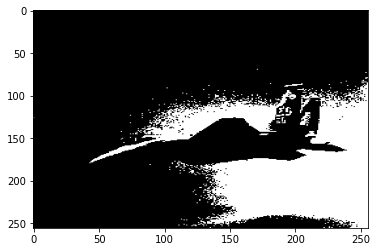

In [25]:
gray2bin_vec = np.vectorize(gray2bin)
binaryImage = gray2bin_vec(image, threshold)
showImage(binaryImage)

## Question 2

Write a program to implement down sampling of an image by a factor of 2. Apply the same effect for 2-3 successive times and comment on visual content. Finally, write a program to upscale the down sampled image through interpolation and comment on visual quality of the image.

###Downsampling Image

In [26]:
DOWNSAMPLING_FACTOR = 2;

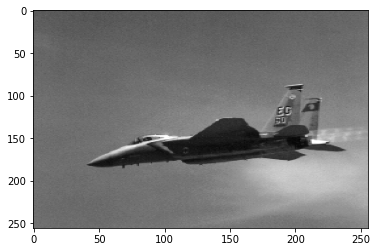

The original image


In [27]:
showImage(image)
print("The original image")

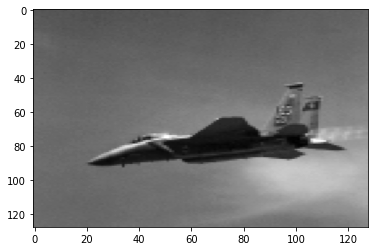

Downsampled once


In [28]:
tempimage = measure.block_reduce(image, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled once")

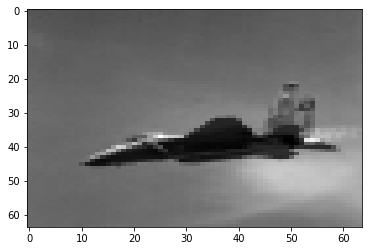

Downsampled twice


In [29]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled twice")

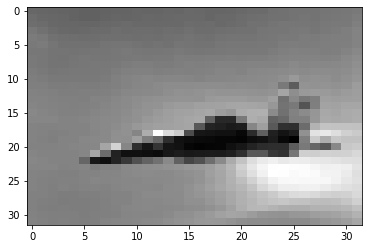

Downsampled thrice


In [30]:
tempimage = measure.block_reduce(tempimage, (DOWNSAMPLING_FACTOR, DOWNSAMPLING_FACTOR), np.mean)
showImage(tempimage)
print("Downsampled thrice")

###Upsampled Image

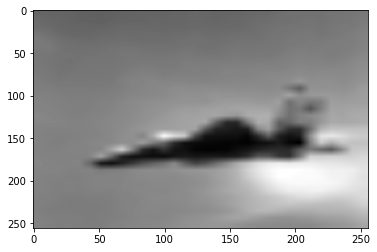

In [31]:
tempimage = cv2.resize(tempimage, image.shape, interpolation = cv2.INTER_LINEAR);
showImage(tempimage)

##Question 3

Write a program to implement image negation operation:
$S = L - 1 - R$ where,

 $L$ = maximum gray value <br>
 $R$ = pixel value of input image <br>
 $S$ = pixel value of output image


In [32]:
def negatePixel(r, l):
  return l-1-r;

255.0


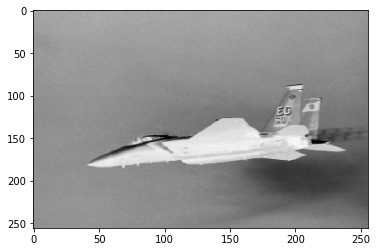

In [33]:
negatePixelVector = np.vectorize(negatePixel);
L = np.max(image)
print(L)
outputImage = negatePixelVector(image, L)
showImage(outputImage)

##Question 4

Write a program to implement change in dynamic range of an image from $[a, b]$ to $[c,d]$. Here $a$ and $c$ are the minimum pixel value of input and output image respectively and $b$ and $d$ are the maximum for the two. 

In [34]:
def rescalePixel(pixelValue, a, b, c, d):
  return (pixelValue-a) * (d-c)//(b-a)  + c;

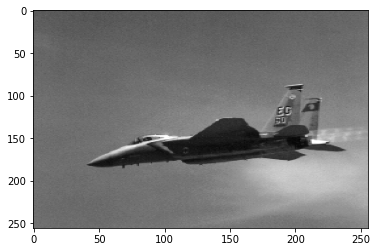

In [35]:
showImage(image)

Enter minimum pixel value for output image: 0
Enter maximum pixel value for output image: 255


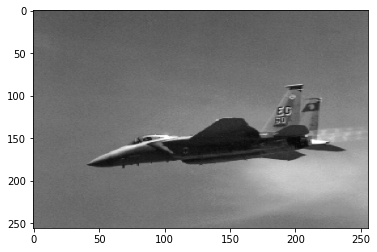

In [36]:
a = np.min(image)
b = np.max(image)

c = int(input("Enter minimum pixel value for output image: "));
d = int(input("Enter maximum pixel value for output image: "));

rescaleImage = np.vectorize(rescalePixel);
output = rescaleImage(image, a, b, c, d);
showImage(output)

## Question 5

Implement image negation operation using logical NOT operation and verify results with using linear transformation function in question 3

In [37]:
def bitcmp(pixel):
  return ~np.uint8(pixel);

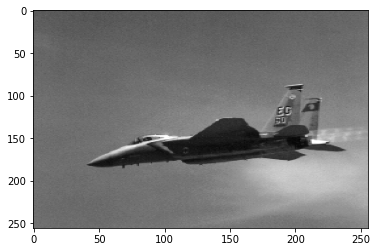

In [38]:
showImage(image)

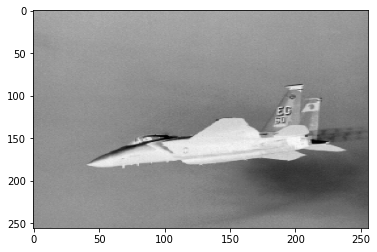

In [39]:
bitcmpImage = np.vectorize(bitcmp)
output = bitcmpImage(image);
showImage(output)

## Question 6

Write a program to develop histogram of an image and show it through display. The size of the image and pixel values is made flexible.

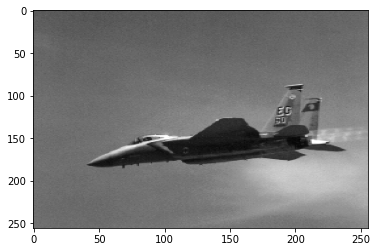

In [40]:
showImage(image)

In [41]:
def plot_hist(image):
  flattened_image = image.flatten()
  plt.hist(flattened_image, bins=32)
  plt.title("Histogram of input image")
  plt.xlabel("Pixel values");
  plt.ylabel("Frequency")
  plt.show()

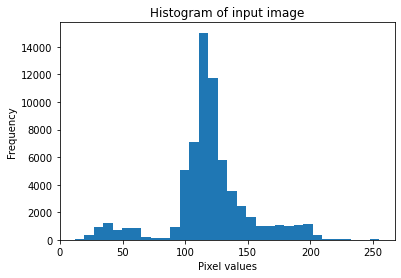

In [42]:
plot_hist(image)

In [43]:
def setZero(pixel, mask):
  return np.uint8(pixel) & mask;

Setting lower order bits to 0


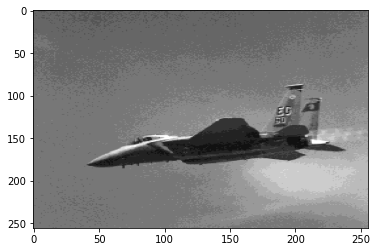

In [44]:
setZeroImage = np.vectorize(setZero);

print("Setting lower order bits to 0")
output_lower_zero = setZeroImage(image, 128+64+32+16);

showImage(output_lower_zero);

Setting higher order bits to 0


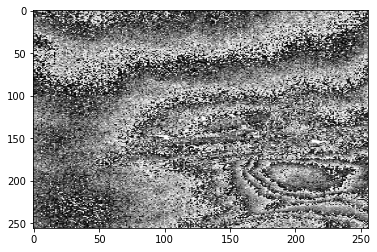

In [45]:
print("Setting higher order bits to 0")
output_higher_zero = setZeroImage(image, 8+4+2+1);

showImage(output_higher_zero);

## Question 7

Write a program to implement histogram equalization of an 8-bit/pixel gray scale image. Show that a second pass of histogram equalization will produce exactly the same result as the first pass.

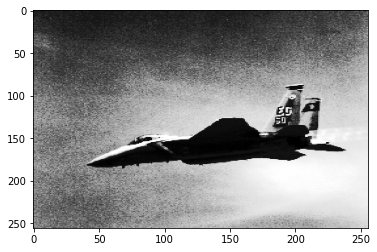

In [46]:
equalised_image = exposure.equalize_hist(image)
showImage(equalised_image)

Second pass of histogram equalisation


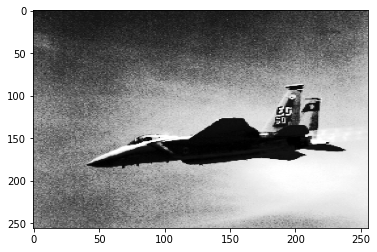

In [47]:
print("Second pass of histogram equalisation")
equalised_image = exposure.equalize_hist(equalised_image)
showImage(equalised_image)

Histogram of original vs equalised image


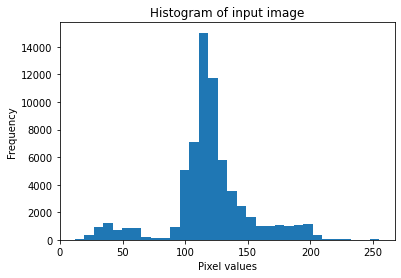

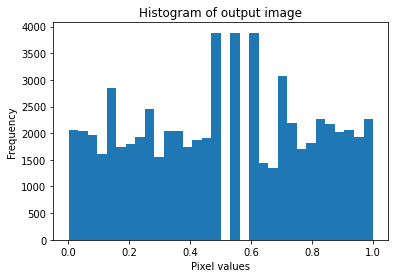

In [48]:
print("Histogram of original vs equalised image")

plt.figure(1)
flattened_image = image.flatten()
plt.hist(flattened_image, bins=32)
plt.title("Histogram of input image")
plt.xlabel("Pixel values");
plt.ylabel("Frequency")

plt.figure(2)
flattened_image = equalised_image.flatten()
plt.hist(flattened_image, bins=32)
plt.title("Histogram of output image")
plt.xlabel("Pixel values");
plt.ylabel("Frequency")

plt.show()

## Question 8

Write a Program to implement additive noise corruption of an image by manipulating $p$% randomly selected pixel values by an amount of $q$% (may be a rand function from $0$ to $15$%) for respective gray values.

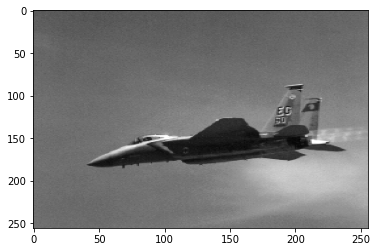

In [49]:
showImage(image)

In [50]:
def addNoise(image, p, q):
  rows = image.shape[0]
  cols = image.shape[1]

  numPixels = p * rows * cols // 100;
  row_ids = [int(random.randint(0,rows-1)) for i in range(numPixels)]
  col_ids = [int(random.randint(0,cols-1)) for i in range(numPixels)]

  output_image = np.array(image);

  for i in range (0,numPixels):
    output_image[row_ids[i]][col_ids[i]] = (image[row_ids[i]][col_ids[i]] * (100+q) // 100) % 256;
  
  return output_image


Enter value of p: 20
Enter value of q: 15


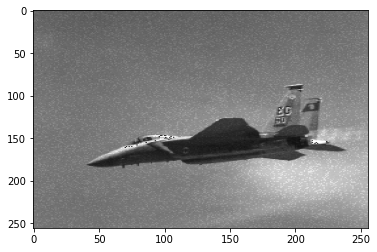

In [51]:
p = int(input("Enter value of p: "))
q = int(input("Enter value of q: "))

output_image = addNoise(image, p, q);
showImage(output_image)

## Question 9

Do the image averaging operation for $K=8,16,32$ number images (changing the value of p and q) and find the difference between the original and averaged image.

In [52]:
def averageImage(image, K):
  p_vals = [int(random.randint(0,50)) for i in range(K)]
  q_vals = [int(random.randint(0,15)) for i in range(K)]
  
  output_image = addNoise(image, p_vals[0], q_vals[0]);

  for i in range(1, K):
    output_image += addNoise(image, p_vals[1], q_vals[1]);

  output_image = output_image // 8;

  return output_image;

K =  8


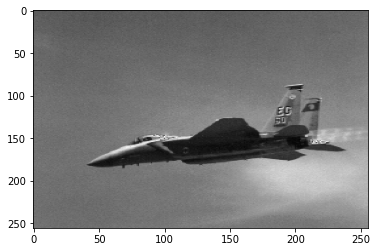

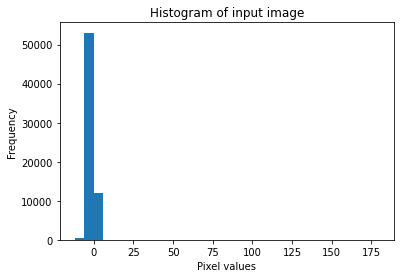

K =  16


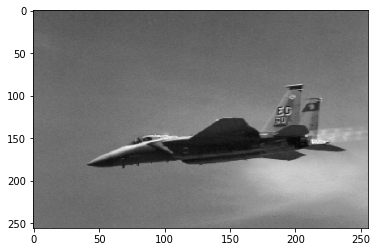

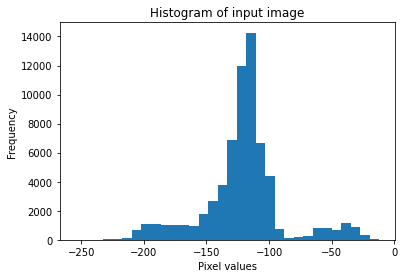

K =  32


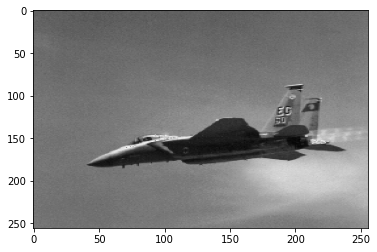

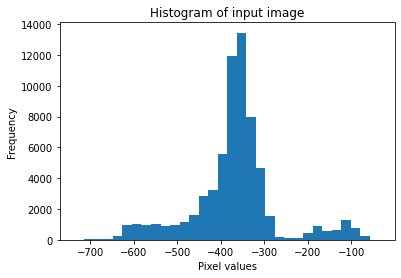

In [53]:
K_vals = [8, 16, 32];

for k in K_vals:
  output_image = averageImage(image, k);
  print("K = ", k);
  showImage(output_image);
  plot_hist(image-output_image)

## Question 10

Write a Program to implement spatial mean operation (say considering 3x3 window)
and applying it on a gray scale noisy image. Show the filtering effect after the variable window size (5x5, 7x7). Discuss the limiting effect of repeatedly applying a 3x3 low pass spatial filter to a digital image. (apply 3x3 window two times i.e. twice). Show that the filtering results are equivalent i.e. output image obtained after applying 3x3 window twice is equivalent applying 5x5 window once.

In [54]:
def apply_filter(image, filter_size):
  output_image = np.floor(uniform_filter(image, size=filter_size))
  return output_image

Original image


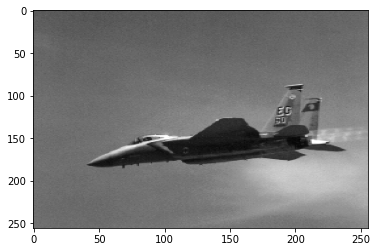

Filter size = 3


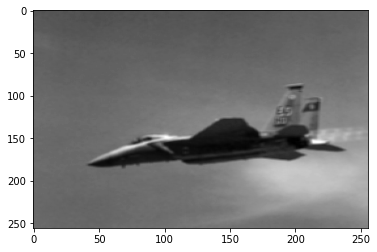

Filter size = 3 twice


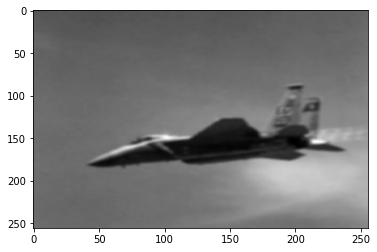

Filter size = 5


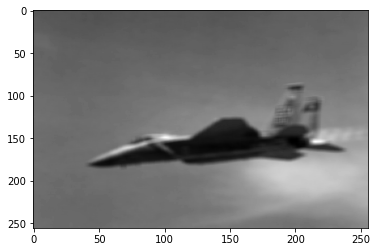

Filter size = 7


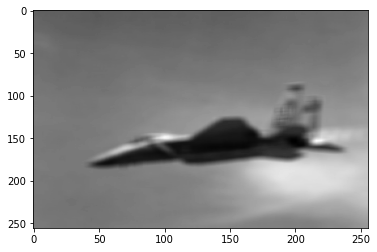

In [55]:
print("Original image")
showImage(image)

print("Filter size = 3")
output_image = apply_filter(image, 3)  
showImage(output_image)

print("Filter size = 3 twice")
output_image = apply_filter(output_image, 3)  
showImage(output_image)

print("Filter size = 5")
output_image = apply_filter(image, 5)  
showImage(output_image)

print("Filter size = 7")
output_image = apply_filter(image, 7)  
showImage(output_image)

Enter the filter window size: 5


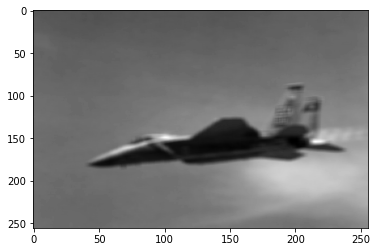

In [56]:
k = int(input("Enter the filter window size: "))
showImage(apply_filter(image, k))

## Question 11

Write a program to implement both mode and median filtering operation and applying it on gray scale noisy image. Show the filtering effect for variable window size. Show that the median filtering results are equivalent i.e. output image obtained after applying 3x3 window twice is equivalent applying 5x5 window once.

Enter the window size for median filter: 5


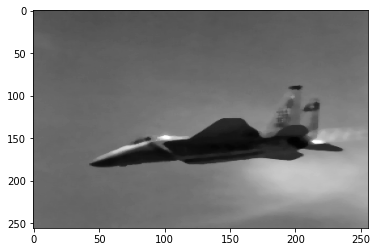

In [57]:
k = int(input("Enter the window size for median filter: "))
showImage(median_filter(image, k));

In [58]:
def get_mode(arr):
  return mode(arr, axis=None)[0][0]

In [59]:
def mode_filter(image, k):
  return generic_filter(image, get_mode, k);

Enter the window size for mode filter: 5


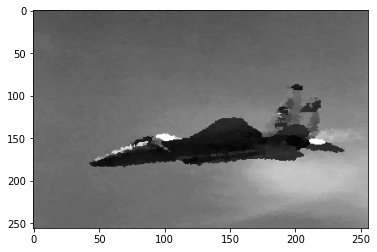

In [60]:
k = int(input("Enter the window size for mode filter: "))
showImage(mode_filter(image, k));

## Question 12

Write a program to calculate ∆x and ∆y for each pixel of an input image f(x,y) using gradient operator. Replace each pixel point by |∆x| + |∆y| and then implement image-sharpening operation.

In [61]:
def delta(image):
  delxarr = np.zeros(image.shape);
  delyarr = np.zeros(image.shape);

  for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
      delxarr[i][j] = abs(image[i+1][j] - image[i-1][j])
      delyarr[i][j] = abs(image[i][j+1] - image[i][j-1])

  return delxarr + delyarr;

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  5. ...  5.  6.  0.]
 [ 0. 14.  3. ...  6. 14.  0.]
 ...
 [ 0.  6.  5. ...  6.  9.  0.]
 [ 0. 15.  3. ...  8.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


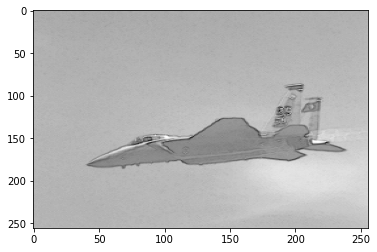

In [62]:
deltaXplusdeltaY = delta(image)
print(deltaXplusdeltaY)

sharpenedImage = image - deltaXplusdeltaY;
showImage(sharpenedImage)

## Question 13

Write a program to calculate ∆x and ∆y for each pixel of an input image f(x,y) using Sobel Operator (gradient operator) shown below

$$\Delta x = 
\left(\begin{array}{cc} 
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{array}\right)$$'

$$\Delta y = 
\left(\begin{array}{cc} 
-1 & -2 & -1\\
 0 & 0 & 0\\
 1 & 2 & 1\\
\end{array}\right)$$'



In [80]:
def sharpen_image(image, kernel_x, kernel_y):
  sum_delxy = getDeltaMatrix(image, kernel_x, kernel_y);
  output_image = image - sum_delxy;
  return output_image

In [81]:
def getDeltaMatrix(image, kernel_x, kernel_y):
  output_image_x = cv2.filter2D(image, -1, kernel_x)
  output_image_y = cv2.filter2D(image, -1, kernel_y)
  sum_delxy = np.abs(output_image_x) + np.abs(output_image_y);
  return sum_delxy;

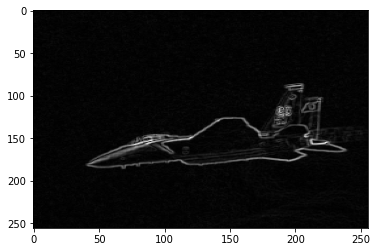

In [82]:
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])
output_image = getDeltaMatrix(image, kernel_x, kernel_y);
showImage(output_image)

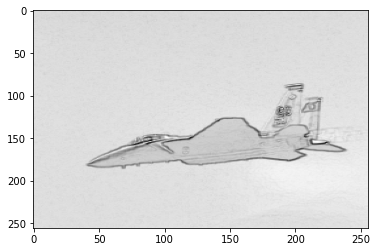

In [83]:
output_image = sharpen_image(image, kernel_x, kernel_y);
showImage(output_image)

## Question 14

Write a program to calculate ∆x and ∆y for each pixel of an input image f(x,y) using Prewitt’s operator (gradient operator)           

$$\Delta x = 
\left(\begin{array}{cc} 
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{array}\right)$$

$$\Delta y = 
\left(\begin{array}{cc} 
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{array}\right)$$



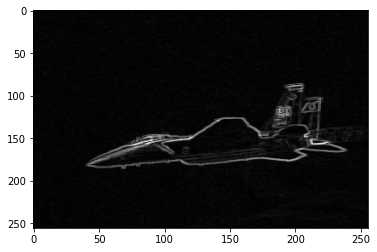

In [84]:
kernel_x = np.array([[-1,0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])
kernel_y = np.array([[-1,-1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

sum_delxy = getDeltaMatrix(image, kernel_x, kernel_y);
showImage(sum_delxy)


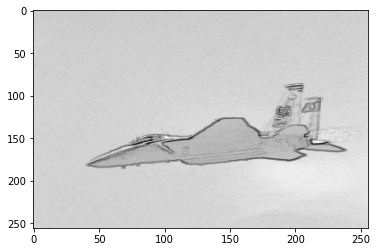

In [86]:
output_image = sharpen_image(image, kernel_x, kernel_y)
showImage(output_image)

## Question 15

Write a program to implement Laplacian operation for the input image f(x,y) using the following operator

$$K = 
\left(\begin{array}{cc} 
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0\\
\end{array}\right)$$

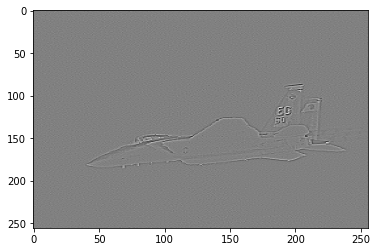

In [89]:
kernel1 = np.array([[0, 1, 0],
          [1, -4, 1],
          [0, 1, 0]])
output_image = cv2.filter2D(image, -1, kernel1)
showImage(output_image)

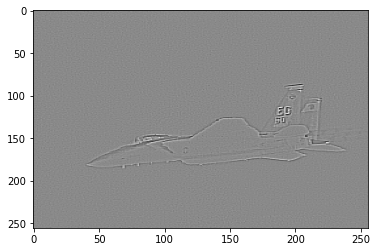

In [90]:
kernel2 = np.array([[1, 1, 1],
          [1, -8, 1],
          [1, 1, 1]])
output_image = cv2.filter2D(image, -1, kernel2)
showImage(output_image)

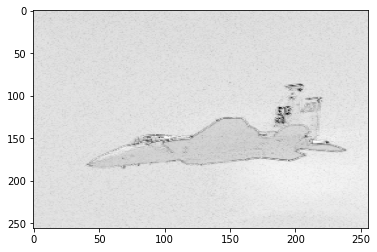

In [93]:
showImage(sharpen_image(image, kernel1, kernel2))

## Question 16

Write a program to implement high boost filtering using the operator as shown
below. Show the effect for different $A$ values

$$K = 
\left(\begin{array}{cc} 
0 & 1 & 0\\
1 & A-4 & 1\\
0 & 1 & 0\\
\end{array}\right)$$

Enter the value of A: 32


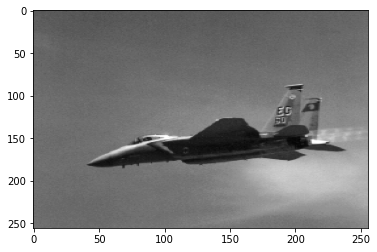

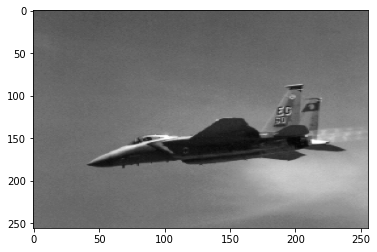

In [103]:
A = int(input("Enter the value of A: "))
kernel1 = np.array([[0, 1, 0],
          [1, A-4, 1],
          [0, 1, 0]])
output_image = cv2.filter2D(image, -1, kernel1)
showImage(output_image)

kernel2 = np.array([[1, 1, 1],
          [1, A+8, 1],
          [1, 1, 1]])
output_image = cv2.filter2D(image, -1, kernel2)
showImage(output_image)

## Question 17

Write a program to implement $2D$ transformation by an amount of $5$ units in the right and $7$ units upward to each pixel of a given input image $f(x, y)$.

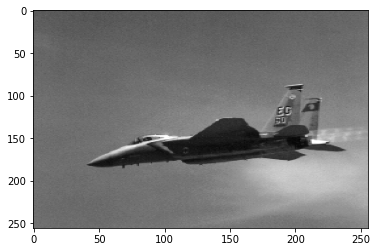

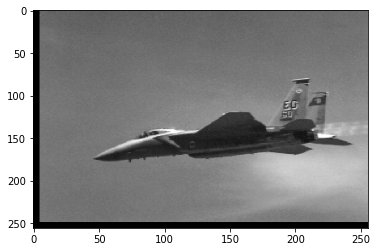

In [106]:
output = np.zeros(image.shape)
for i in range(0, image.shape[0]):
  for j in range(0, image.shape[1]):
    x = i-7
    y = j+5;

    if (x >= 0 and y < image.shape[1]):
      output[x][y] = image[i][j];
showImage(image);
showImage(output);

## Question 18

Write program to implement image scaling operation in Horizontal direction by an amount 1.42 and Vertical direction by an amount 1.6.

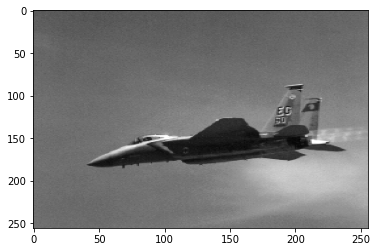

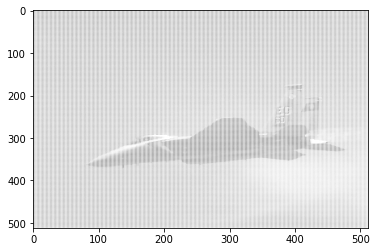

In [124]:
scale_x = 2
scale_y = 2

new_rows = np.ceil(image.shape[0]*scale_x).astype(int)
new_cols = np.ceil(image.shape[1]*scale_y).astype(int)
output = np.ones((new_rows, new_cols))*255

for i in range(0, image.shape[0]):
  for j in range(0, image.shape[1]):
    x = np.ceil(i * scale_x).astype(int)
    y = np.ceil(j * scale_y).astype(int)
    output[x][y] = image[i][j]

showImage(image);
showImage(output);

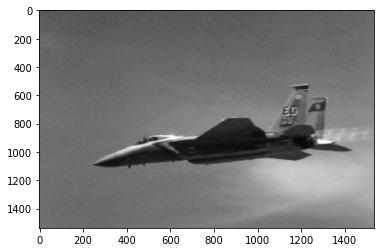

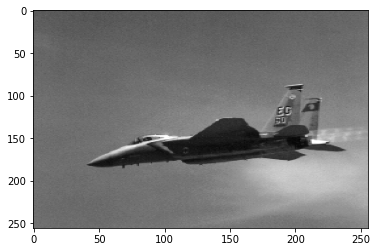

In [129]:
# Alternate

from skimage.transform import resize

S = resize(image,(int(image.shape[0] * 6),int(image.shape[1] * 6)))
showImage(S)
showImage(image)

## Question 19

Write a program to implement image rotation operation by amount of 

a) $25$ degree 

b) $45$ degree 

c) $60$ degree

Angle = 25 degrees


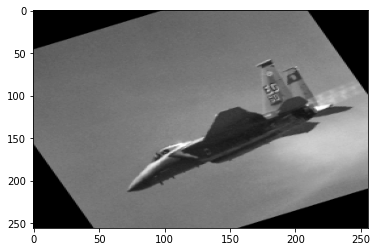

Angle = 45 degrees


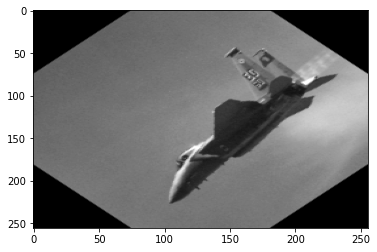

Angle = 60 degrees


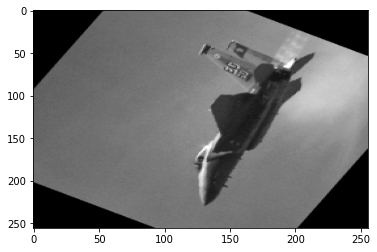

In [160]:
angles = [25, 45, 60]

for angle in angles:
  print("Angle =", angle, "degrees")
  showImage(rotate(image, angle))